## Sampling from a Poisson distribution

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import logistic

Complete the following code to sample from a Poisson distribution using the direct inversion method.
You should only use uniform random variables on $[0,1]$.

In [12]:
def poisson_sampling_direct(llambda,n):
    sample = []
    for _ in range(n):
        U = np.random.uniform(0, 1)
        k = 0
        prob_k = np.exp(-llambda)
        cum_prob = prob_k
        while cum_prob < U:
            k += 1
            prob_k = prob_k * llambda/(k)
            cum_prob += prob_k
        sample.append(k)
    return sample

Test your method comparing the emperical histogram obtained from the method you have implemented and the one obtained using the function np.random.poisson.
You will consider $\lambda \in \{0.1,1,10\}$.

c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


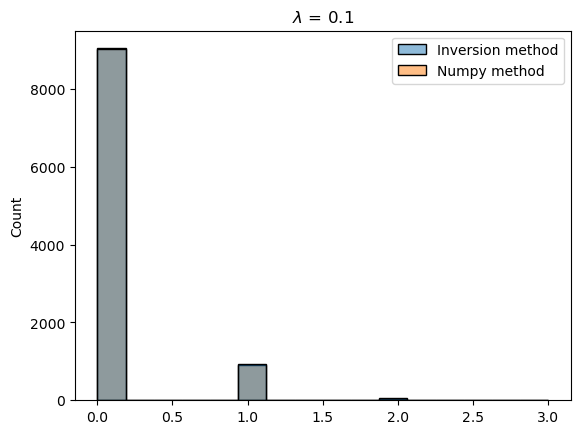

c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


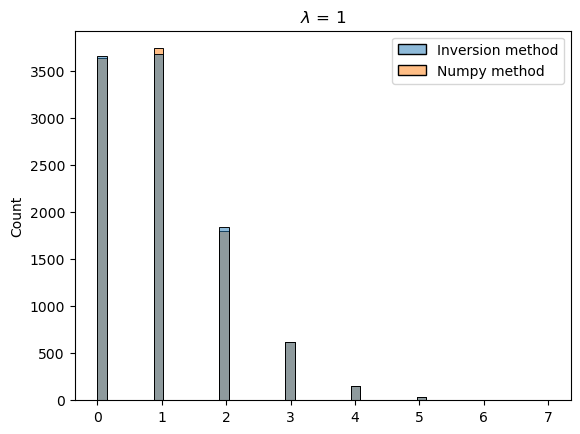

c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


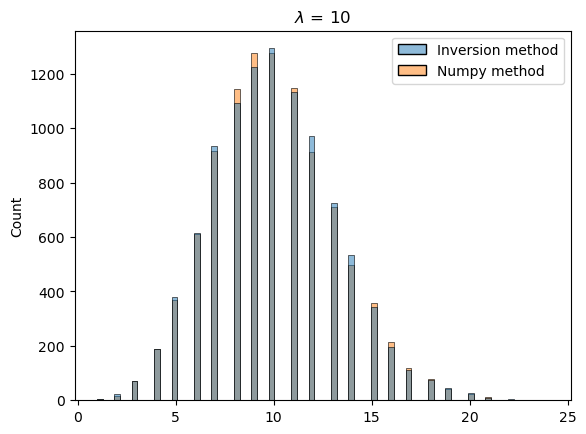

In [22]:
lambdas = [0.1, 1, 10]
n = 10000

for i, L in enumerate(lambdas):
    samples = dict()
    samples['Inversion method']= poisson_sampling_direct(L, n)
    samples['Numpy method'] = np.random.poisson(L, n)
    
    sns.histplot(samples)
    plt.title(rf'$\lambda$ = {L}')
    plt.show()

In the following we aim to sample from a Poisson distribution using the accept-reject method with instrumental distribution based on the logistic distribution with parameter $\alpha = \lambda$ and $\beta = \pi/\sqrt{2\lambda}$.
You should only use uniform random variables on $[0,1]$.

We first implement a method to sample from the logistic distribution with parameter $\alpha$ and $\beta$ restricted to $[-1/2,\infty)$.

In [23]:
# Make a function to sample from the logistic distribution with parameter
# alpha and beta using the inverse transform method

def logistic_sampling(alpha,beta,n):
    U = np.random.rand(n)
    return alpha-beta * np.log(1/U - 1)


# Make a function to sample from the logistic distribution with parameter
# alpha and beta given $X \leq 1/2$. 

def logistic_sampling_half(alpha,beta,n):
    F_half = 1/(1 + np.exp(-(-1/2-alpha)/beta))
    U = np.random.rand(n)
    return alpha - beta * np.log(1/(U*(1-F_half)+ F_half) - 1)

We now aim to implement a function which gives the probability $\mathbb{P}(N=k)$ where $N = \lfloor X +1/2 \rfloor$  where $X$ is distributed according to the logistic distribution with parameter $\alpha$ and $\beta$ restricted to $[-1/2,\infty)$.

*Question*: compute for any $k\in\mathbb{N}$, $\mathbb{P}(N=k)$.

We can express the probability as:

$\mathbb{P}(N = k) = \frac{\mathbb{P}\left(k - \frac{1}{2} \leq X < k + \frac{1}{2}\right)}{\mathbb{P}\left(- \frac{1}{2} \leq X < \infty\right)}$

And using the CDF for logistic distribution, which is given by $F(x) = \frac{1}{1 + e^{-\frac{x - \alpha}{\beta}}}$, we can say that:

$\mathbb{P}(N = k) = \frac{F\left(k + \frac{1}{2}\right) - F\left(k - \frac{1}{2}\right)}{1 - F\left(- \frac{1}{2}\right) }$

Where:

$F\left(k + \frac{1}{2}\right) = \frac{1}{1 + e^{-\frac{k - \alpha + \frac{1}{2}}{\beta}}}$

$F\left(k - \frac{1}{2}\right) = \frac{1}{1 + e^{-\frac{k - \alpha - \frac{1}{2}}{\beta}}}$

$F\left(- \frac{1}{2}\right) = \frac{1}{1 + e^{-\frac{- \alpha - \frac{1}{2}}{\beta}}}$

Replacing the above in the probability formula:

$\mathbb{P}(N = k) = \frac{\frac{1}{1 + e^{-\frac{k - \alpha + \frac{1}{2}}{\beta}}} - \frac{1}{1 + e^{-\frac{k - \alpha - \frac{1}{2}}{\beta}}}}{1 - \frac{1}{1 + e^{-\frac{- \alpha - \frac{1}{2}}{\beta}}}}$

Make a function which returns $\log \mathbb{P}(N=k)$. You may use the function provided logexp.

In [24]:
def logexp(x):
    x1 = (x<= 4)*np.log(1+np.exp(x))
    x2 = (x > 4)*(x+np.log(1+np.exp(-x)))
    x = x1+x2
    return x

# Make a function which returns $\log P(N=k)$
def proba_N(k,alpha,beta):
    F1 = 1 / (1 + np.exp(-(k + 1/2 - alpha) / beta))
    F2 = 1 / (1 + np.exp(-(k - 1/2 - alpha) / beta))
    F3 = 1 / (1 + np.exp(-(-1/2 - alpha) / beta))
    
    log_P = logexp(np.log(F1)) + logexp(np.log(1 - F2 / F1)) - np.log(F3)
    
    return log_P

Verify that your code is correct by comparing the histogram you obtain from proba_N with an empirical histogram obtained from sampling from $N$

c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


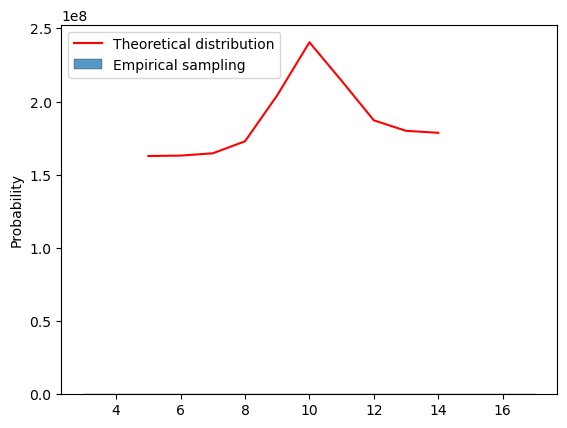

In [25]:
#Verify that your code is correct by comparing the histogram 
#you obtain from proba_N with an emperical histogram 
#obtained from sampling from $N$
Lambda =10

alpha = Lambda 
beta= np.pi/np.sqrt(Lambda*3)
N = 100000

p_N = np.vectorize(lambda k : proba_N(k,alpha, beta))

X = np.arange(Lambda/2, Lambda + Lambda/2)
samples = logistic_sampling_half(alpha,beta, N)

probas = np.exp(p_N(X))

plt.plot(X, probas, color = 'red', label = "Theoretical distribution")
sns.histplot(np.floor(samples + 1/2), stat='probability', label = "Empirical sampling")
plt.legend()


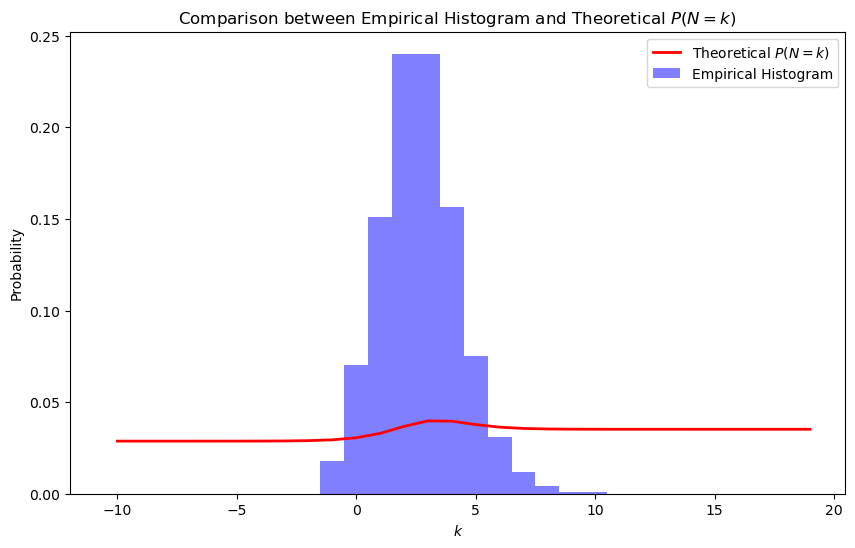

In [4]:
# Generate samples from logistic distribution with parameters alpha and beta
alpha = 3
beta = 1
n_samples = 10000
samples = logistic_sampling_half(alpha, beta, n_samples)

# Generate an empirical histogram from the samples
bins = np.arange(-10, 20)  # Choosing bin range based on alpha and beta
hist, bin_edges = np.histogram(samples, bins=bins, density=True)

# Compute P(N=k) using proba_N for the same bins
k_values = np.arange(-10, 20)
log_probs = np.array([proba_N(k, alpha, beta) for k in k_values])
probs = np.exp(log_probs)

# Normalize the probabilities to match the histogram's scale
probs = probs / np.sum(probs)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist, width=1.0, alpha=0.5, label='Empirical Histogram', color='blue')
plt.plot(k_values, probs, 'r-', label='Theoretical $P(N=k)$', linewidth=2)
plt.xlabel('$k$')
plt.ylabel('Probability')
plt.legend()
plt.title('Comparison between Empirical Histogram and Theoretical $P(N=k)$')
plt.show()

We recall that for any $\lambda$, it was stated in the course that 
$$
 \sup_n \lambda^n/(\mathbb{P}(N = n) e^{\lambda} n!) < 1/(0.767 - 3.36/\lambda).
$$
Verify numerically that this is true for $\lambda \in \{10,100\}$.

In [ ]:
# Verify numerically that this is true for $\lambda \in \{10,100\}$. 

From the previous functions that we have implemented, code a function
that sample from the Poisson distribution using the accept-reject method
based on the logistic distribution restricted to $[-1/2,\infty]$ with 
parameter $\alpha = \lambda$ and $\beta = \pi/\sqrt{3\lambda}$.


In [7]:
# Make a function which samples from the Poisson distribution using the
# acceptance-rejection method using the logistic distribution

def poisson_sampling_logistic(llambda,n):

Verify your method by ploting the empirical histogram you obtained from the method you have implemented and the one of the Poisson distribution

In [ ]:
# Test your function for $\lambda \in \{10,100\}$

Compare the computational times of the two methods that you have implemented
for sampling from the Poisson distribution for a number of samples $n=10000$ and 
$\lambda \in \{10,100,200\}$.

In [ ]:
# Make a comparison of the two methods for $\lambda \in \{10,100\}$ and $n=10000$.